<a href="https://colab.research.google.com/github/karyateguh/Book-Recommendation/blob/master/Book_Recommendation_System_Collaborative_Sparce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Domain

In a world where millions of books are published and countless readers seek their next favorite story, finding the perfect match between a book and a reader has become increasingly challenging. The advent of digital platforms has expanded access to books, but with this access comes a new problem: information overload. Readers are often overwhelmed by the sheer volume of options, making it difficult to discover books that truly resonate with their tastes.

This is where recommendation systems play a crucial role. By analyzing user behavior and preferences, these systems can suggest books that align with individual interests, offering a personalized reading experience. Such systems not only improve user satisfaction but also have a significant impact on the publishing and retail industries, driving sales and reader engagement.

The Book Recommendation System project aims to address this challenge by leveraging data from the Book-Crossing dataset, a widely studied resource in recommender system research. The dataset offers a wealth of information, including user demographics, book metadata, and user ratings, making it an excellent foundation for building and evaluating recommendation algorithms.

**Importance of the Project**

Developing an effective recommendation system is essential for both users and businesses:

For Readers: A personalized recommendation system acts like a digital librarian, helping users discover books that match their unique preferences. This enhances the reading experience, reduces search effort, and introduces users to books they might not have found otherwise.

For Businesses: Book retailers, publishers, and libraries can benefit from improved customer retention and sales through tailored recommendations. By understanding user preferences, businesses can optimize inventory, highlight popular titles, and promote lesser-known works to the right audience.

For Research: The project provides an opportunity to evaluate and refine various recommendation algorithms, contributing to the broader field of recommender systems. Insights from this research can be applied to other domains, such as movie, music, or product recommendations.

**Supporting Research**

The significance of recommendation systems is well-documented in academic literature. For instance:

Ricci et al. (2015) highlighted the importance of collaborative filtering techniques in delivering accurate and scalable recommendations.

Koren, Bell, and Volinsky (2009) emphasized the value of matrix factorization methods, such as SVD and SVD++, for improving prediction accuracy in sparse datasets.

George and Merugu (2005) introduced co-clustering methods as a robust approach for handling the "cold start" problem in sparse data environments.

These studies underscore the relevance of developing sophisticated algorithms tailored to the unique challenges of recommendation systems, such as sparse data, long-tail distributions, and balancing precision and recall.

This project aims to overcome these challenges by systematically cleaning, preprocessing, and evaluating the data using state-of-the-art recommendation algorithms, ultimately delivering a system that balances accuracy and user satisfaction.

By bridging the gap between readers and books, this project aspires to transform the way people discover literature, enriching their lives one recommendation at a time.


# Business Understanding

Problem Statements:

1. Which recommendation model offers the most accurate predictions, and why?
2. How relevant are the top ten recommendations provided by the best-performing model?

Goals:

1. To identify the most accurate recommendation model and understand its relevance to users.
2. To evaluate the top ten recommendations from the best model in terms of user relevance and engagement.


Solutions

Designing a recommendation system is like creating a personal librarian for each user—one that knows their preferences and introduces them to books they'll love. In this project, we evaluated four different algorithms: SVD, SVD++, NMF, and CoClustering, comparing their strengths and weaknesses to select the most suitable model for a book recommendation system. The evaluations were conducted based on metrics like RMSE, precision, and recall, which are widely used in recommendation system research (Koren et al., 2009; Ricci et al., 2011).



# Data Understanding

## Import Library

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357282 sha256=8b257c5ae5a22ad50dd7ade78ea1add3dfb0496783de5c03ededf8b9237786e9
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate

from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from surprise import SVD, SVDpp, NMF, CoClustering
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy
from collections import defaultdict

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d somnambwl/bookcrossing-dataset

mv: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/somnambwl/bookcrossing-dataset
License(s): unknown
 89% 15.0M/16.8M [00:01<00:00, 14.6MB/s]
100% 16.8M/16.8M [00:01<00:00, 9.20MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("bookcrossing-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("book_recommendation")

os.listdir("book_recommendation")

['Books.csv', 'Ratings.csv', 'Users.csv']

In [ ]:
books = pd.read_csv("book_recommendation/Books.csv", sep=';', on_bad_lines='warn') # Setting the delimiter to ';' and handling bad lines
users = pd.read_csv("book_recommendation/Users.csv", sep=';', on_bad_lines='warn') # Setting the delimiter to ';' and handling bad lines
ratings = pd.read_csv("book_recommendation/Ratings.csv", sep=';', on_bad_lines='warn') # Setting the delimiter to ';' and handling bad lines

In [ ]:
books

,ISBN,Title,Author,Year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company
...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [ ]:
users

,User-ID,Age
0,1,NaN
1,2,18
2,3,NaN
3,4,17
4,5,NaN
...,...,...
278854,278854,NaN
278855,278855,50
278856,278856,NaN
278857,278857,NaN


In [ ]:
ratings

,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


## Display initial information about the datasets

In [ ]:
print("Books dataset info:")
books.info()

print("\nUsers dataset info:")
users.info()

print("\nRatings dataset info:")
ratings.info()

Books dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271379 non-null  object
 1   Title      271379 non-null  object
 2   Author     271377 non-null  object
 3   Year       271379 non-null  int64 
 4   Publisher  271377 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB

Users dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278859 non-null  object
 1   Age      168627 non-null  object
dtypes: object(2)
memory usage: 4.3+ MB

Ratings dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0 

We get two of each in Author and Publisher rows missing. Almost a half Age rows is missing.

## Check for missing rows

In [ ]:
print("\nBooks - Rows with missing values:")
books[books.isna().any(axis=1)]

print("\nUsers - Rows with missing values:")
users[users.isna().any(axis=1)]

print("\nRatings - Rows with missing values:")
ratings[ratings.isna().any(axis=1)]


Books - Rows with missing values:

Users - Rows with missing values:

Ratings - Rows with missing values:


,User-ID,ISBN,Rating


## Check for duplicate rows



In [ ]:
print("\nBooks - Duplicate rows:")
print(books[books.duplicated()])

print("\nUsers - Duplicate rows:")
print(users[users.duplicated()])

print("\nRatings - Duplicate rows:")
print(ratings[ratings.duplicated()])


Books - Duplicate rows:
              ISBN                                              Title  \
111813  0486404242  War in Kind: And Other Poems (Dover Thrift Edi...   

               Author  Year           Publisher  
111813  Stephen Crane  1998  Dover Publications  

Users - Duplicate rows:
Empty DataFrame
Columns: [User-ID, Age]
Index: []

Ratings - Duplicate rows:
Empty DataFrame
Columns: [User-ID, ISBN, Rating]
Index: []


We have ONE duplicate row.

# EDA

## Count unique users and books in the ratings dataset

In [ ]:
print(f"Number of unique users: {ratings['User-ID'].nunique()}")
print(f"Number of unique books: {ratings['ISBN'].nunique()}")

Number of unique users: 105283
Number of unique books: 340556


We have very big data. And also sparse data.

## Rating Distribution

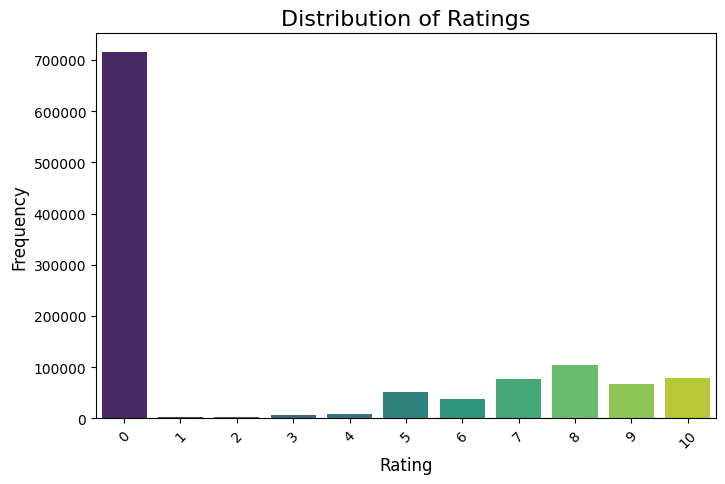

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=ratings, x='Rating', palette='viridis')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Too many users giving a 0 rating.

## Top 10 Most Rated Books

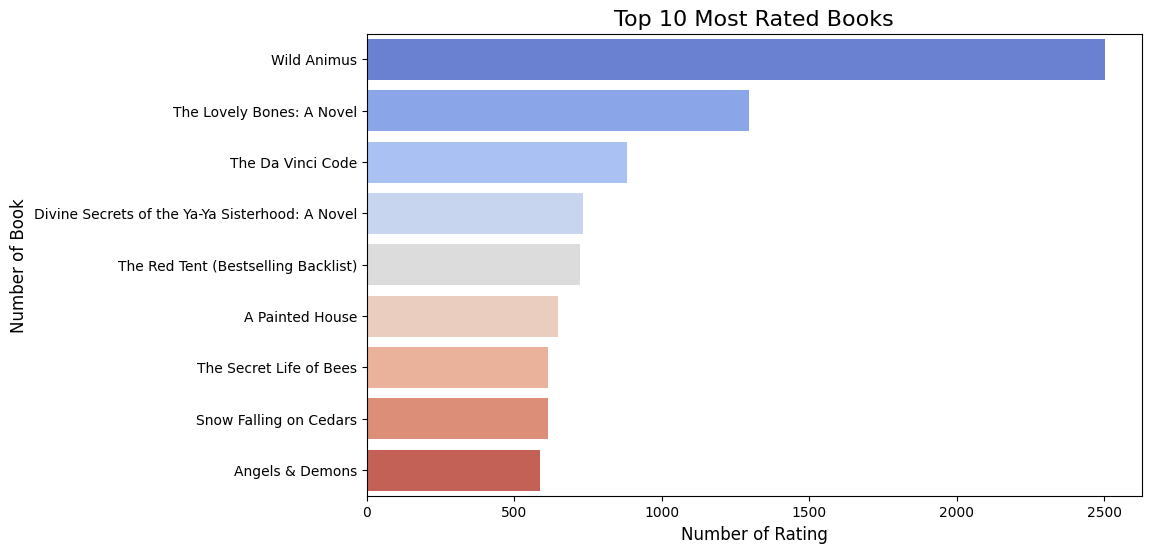

In [ ]:
top_books = ratings['ISBN'].value_counts().head(10).reset_index()
top_books.columns = ['ISBN', 'Rating Count']
top_books = top_books.merge(books, on='ISBN', how='left')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_books, x='Rating Count', y='Title', palette='coolwarm')
plt.title('Top 10 Most Rated Books', fontsize=16)
plt.xlabel('Number of Rating', fontsize=12)
plt.ylabel('Number of Book', fontsize=12)
plt.show()

Seems like Users take much attention in Wild Animus.

## Top 10 User Giving Most Ratings

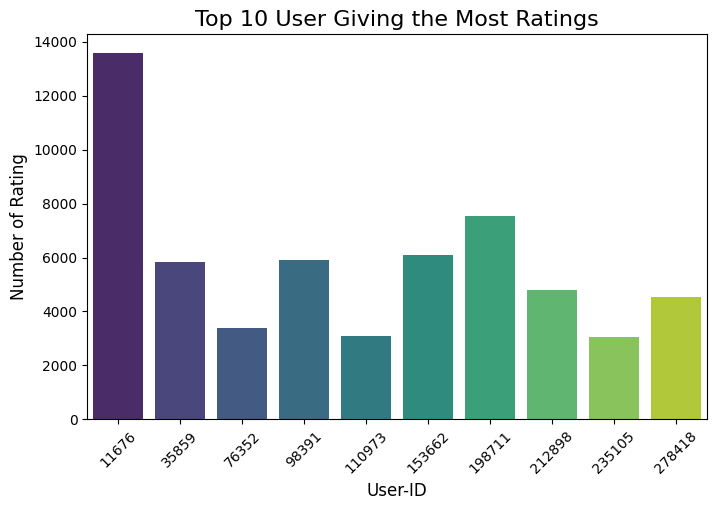

In [ ]:
top_users = ratings['User-ID'].value_counts().head(10).reset_index()
top_users.columns = ['User-ID', 'Rating Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=top_users, x='User-ID', y='Rating Count', palette='viridis')
plt.title('Top 10 User Giving the Most Ratings', fontsize=16)
plt.xlabel('User-ID', fontsize=12)
plt.ylabel('Number of Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()

There is a user giving almost 14000 rating.

## Book Publication Trend

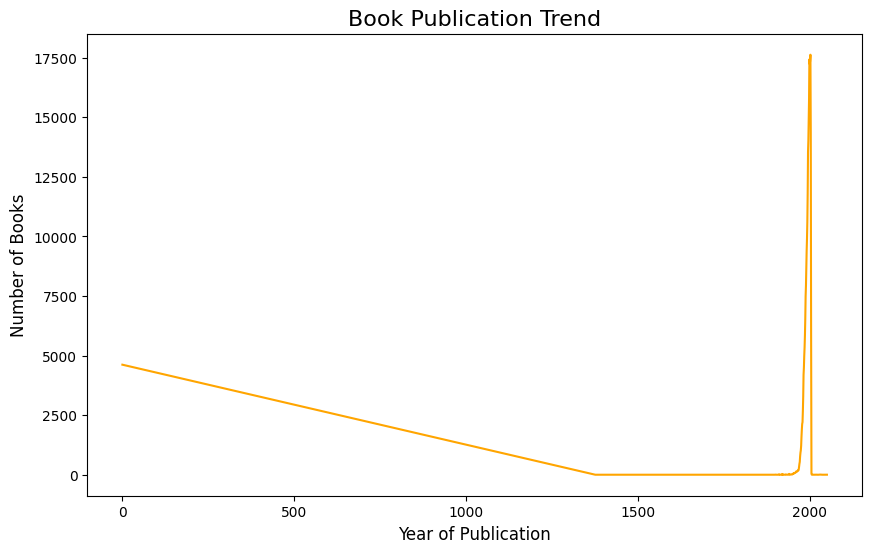

In [ ]:
year_counts = books['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, color='orange')
plt.title('Book Publication Trend', fontsize=16)
plt.xlabel('Year of Publication', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.show()

Most of books published in 2000

## Top 10 Publishers Pusblish The Books

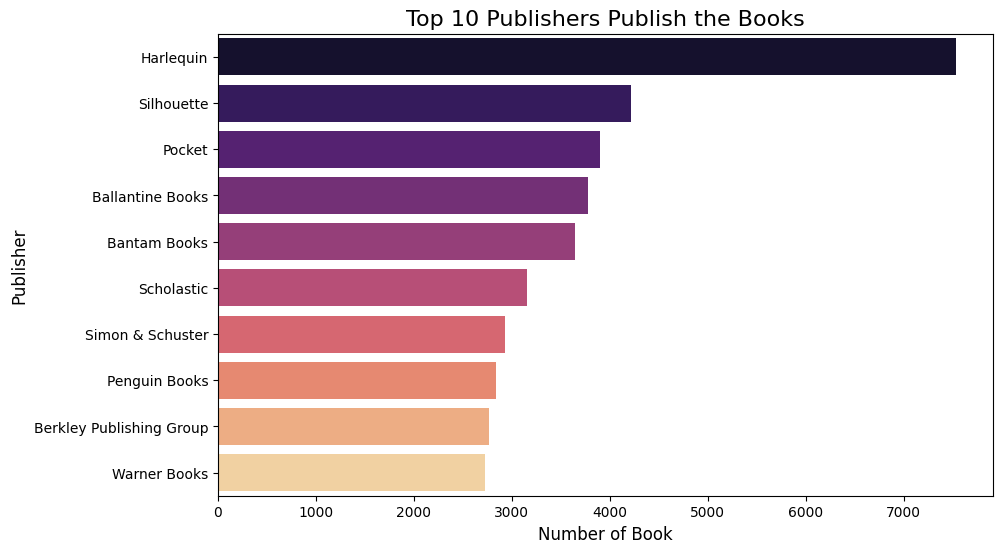

In [ ]:
top_publishers = books['Publisher'].value_counts().head(10).reset_index()
top_publishers.columns = ['Publisher', 'Book Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_publishers, x='Book Count', y='Publisher', palette='magma')
plt.title('Top 10 Publishers Publish the Books', fontsize=16)
plt.xlabel('Number of Book', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.show()


Harlequin has the biggest number of books.

# Data Cleaning

## Clean the Duplicate

In [ ]:
books.drop_duplicates(subset=['ISBN'], keep='first', inplace=True)
users.drop_duplicates(subset=['User-ID'], keep='first', inplace=True)
ratings.drop_duplicates(subset=['User-ID', 'ISBN'], keep='first', inplace=True)

Duplicate entries can distort analysis by over-representing certain data points. For example:

In the Books dataset, duplicates in the ISBN column would imply multiple records for the same book, leading to inconsistencies in matching ratings. In the Users dataset, repeated User-ID entries could inflate the number of unique users, skewing demographic analysis. In the Ratings dataset, repeated combinations of User-ID and ISBN might suggest duplicate ratings for the same book by the same user, misleading recommendation algorithms. Removing duplicates ensures that every book, user, and rating is represented only once, providing a cleaner foundation for analysis. According to data integrity principles, removing duplicates helps maintain the accuracy of insights derived from the data .

## Handling Missing Value

In [ ]:
# Ratings dataset: Remove duplicates
ratings.drop_duplicates(inplace=True)

# Ensure consistency between datasets
ratings = ratings[ratings['ISBN'].isin(books['ISBN'])]
ratings = ratings[ratings['User-ID'].isin(users['User-ID'])]

books.dropna(subset=['Author', 'Publisher'], inplace=True)


Datasets often reference one another, creating dependencies that must be preserved for reliable analysis. Here:

Ratings include both ISBN (to identify books) and User-ID (to identify users). By filtering the ratings dataset to include only entries where the ISBN exists in the Books dataset and the User-ID exists in the Users dataset, we ensure that all references in the ratings data are valid. For instance, if a rating references a book no longer present in the books dataset, that rating becomes meaningless. Ensuring consistency between datasets is a standard practice to avoid orphan records and maintain relational integrity .

Additionally, the line of code books.dropna(subset=['Author', 'Publisher'], inplace=True) ensures that any entries in the Books dataset with missing values for the Author or Publisher fields are removed. This step guarantees that all books in the dataset have complete and valid information regarding their author and publisher, which is essential for maintaining the accuracy of the data and avoiding incomplete or erroneous book information that could affect subsequent analysis or recommendations.

**NOTE:** It is no need to handle missing value in Age. We do not use it to our analytic process.

In [ ]:
books.info()
users.info()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271374 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271374 non-null  object
 1   Title      271374 non-null  object
 2   Author     271374 non-null  object
 3   Year       271374 non-null  int64 
 4   Publisher  271374 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278859 non-null  object
 1   Age      168627 non-null  object
dtypes: object(2)
memory usage: 4.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 971831 entries, 9561 to 1092750
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  971831 non-null  int64 
 1   ISBN     971831 non-null  object
 

# Preparing dataset

## Filtering Interactions

In [ ]:
min_user_interactions = 5
min_book_interactions = 5

user_counts = ratings['User-ID'].value_counts()
book_counts = ratings['ISBN'].value_counts()

ratings_filtered = ratings[
    (ratings['User-ID'].isin(user_counts[user_counts >= min_user_interactions].index)) &
    (ratings['ISBN'].isin(book_counts[book_counts >= min_book_interactions].index))
]


In [ ]:
print(f"Number of users left: {ratings_filtered['User-ID'].nunique()}")
print(f"Number of books left: {ratings_filtered['ISBN'].nunique()}")


Number of users left: 18910
Number of books left: 38543


As we know, we have spase dataset. This technique means to:

* Reduce Sparse Data: Datasets with too many users or books with few ratings can make analysis hard.
* Improve Data Quality: Filtering out users or books with too little interaction keeps the data more useful.
* Improve Performance: Having less data to work with (but better quality) makes models run faster and more accurately.

## Preparing the Dataset for Surprise

In [ ]:
from surprise import Reader, Dataset

reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(ratings_filtered[['User-ID', 'ISBN', 'Rating']], reader)


* Reader: This is a class in the surprise library used to parse data and define the rating scale.

* Dataset: This class is used to load the data into the Surprise format, so it can be used by the recommendation algorithms in the library.

* rating_scale=(0, 10): This sets the rating scale to be from 0 to 10.

The variable data now holds the dataset in the correct format for Surprise to use, and you can use it to train a collaborative filtering model or other types of recommendation algorithms available in Surprise.

## Split Data

In [ ]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


Splitting the dataset into training and test sets is a crucial step in building and evaluating machine learning models, including recommender systems. Here's why it's important:

1. Prevent Overfitting

Overfitting happens when a model learns the details and noise in the training data to such an extent that it performs poorly on unseen data.
If you use all of the data for training, the model will memorize it and will likely perform very well on the training data but fail to generalize to new, unseen data.
By splitting the data into training and test sets, the model is trained on one portion of the data (training set) and tested on a separate portion (test set). This allows you to see how well the model generalizes to new data.

2. Evaluate Model Performance

The test set acts as a proxy for new data the model might encounter in real-world scenarios.
You need a test set to evaluate how well the model performs on unseen data. This gives you an idea of the model's accuracy, robustness, and reliability.
Without a test set, you can't objectively assess the model's performance.

3. Measure Generalization

Generalization refers to the model's ability to make correct predictions on new, unseen data.
By splitting the data, the model is trained on one subset and tested on another, ensuring that you're measuring its ability to generalize, not just memorize the data.

4. Hyperparameter Tuning

In some cases, you may want to tune the hyperparameters of your model (like the number of latent factors for SVD).
Having a test set allows you to evaluate the effect of different hyperparameters on the model's performance without "cheating" by testing the model on the same data it was trained on.

5. Cross-Validation (Optional)

Sometimes, instead of a simple train-test split, you might use cross-validation, where the dataset is split into multiple subsets (folds), and the model is trained and tested on different combinations of these subsets. This gives a more robust estimate of model performance.
However, even when using cross-validation, you still need to ensure that the test data (in each fold) is not part of the training process.

# Write Code Snippet

In [ ]:
# Function for recommending books
def recommend_books(user_id, model, books_df, n_recommendations=10):
    # Books already rated by the user
    rated_books = ratings_filtered[ratings_filtered['User-ID'] == user_id]['ISBN'].unique()
    unrated_books = books_df[~books_df['ISBN'].isin(rated_books)]

    # Predict ratings for unrated books
    predictions = [model.predict(user_id, book) for book in unrated_books['ISBN']]
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get top-n recommendations
    top_books = [pred.iid for pred in predictions[:n_recommendations]]
    return books_df[books_df['ISBN'].isin(top_books)][['ISBN', 'Title', 'Author']]

# Function to compute precision and recall
def precision_recall_at_k(predictions, k=10, threshold=7.0):
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = []
    recalls = []

    for uid, ratings in user_est_true.items():
        ratings.sort(key=lambda x: x[0], reverse=True)
        top_k = ratings[:k]
        n_relevant = sum((true_r >= threshold) for (_, true_r) in ratings)
        n_recommended = sum((true_r >= threshold) for (_, true_r) in top_k)

        if n_recommended > 0:
            precisions.append(n_recommended / k)
        if n_relevant > 0:
            recalls.append(n_recommended / n_relevant)

    precision = sum(precisions) / len(precisions) if precisions else 0
    recall = sum(recalls) / len(recalls) if recalls else 0

    return precision, recall

Precision and Recall are critical evaluation metrics for recommender systems because they measure:

Precision: How good the system is at recommending relevant items. A high precision means most of the recommended books are ones that the user will actually like.

Recall: How effective the system is at recommending all the relevant items. A high recall means the system is good at finding all the books that the user will rate highly.

These metrics give you insight into how well your recommendation system is performing and help you compare different models or algorithms to determine which one provides the best user experience.

Thresholding: The threshold (e.g., 7.0) allows you to define what counts as a relevant recommendation. Ratings above this threshold are considered relevant, while others are not.


**NOTE:**
This technique allows us to not rewrite the same code.

 # Model 1 : Using SVD (Matrix Factorization)

In [ ]:
print("\n### SVD Model ###")
svd = SVD()
svd.fit(trainset)
predictions_svd = svd.test(testset)
rmse_svd = accuracy.rmse(predictions_svd)
print(f"SVD Model RMSE: {rmse_svd:.4f}")


# Precision and Recall for SVD
precision, recall = precision_recall_at_k(predictions_svd, k=10)
print(f"SVD Precision@10: {precision:.2f}, Recall@10: {recall:.2f}")


### SVD Model ###
RMSE: 3.5327
SVD Model RMSE: 3.5327
SVD Precision@10: 0.20, Recall@10: 0.91


In [ ]:
# Recommend books using SVD
user_id = 276729
recommendations_svd = recommend_books(user_id, svd, books)
print(f"\nSVD Recommendations for User {user_id}:\n")
recommendations_svd


SVD Recommendations for User 276729:



,ISBN,Title,Author
1101,0060256672,Where the Sidewalk Ends : Poems and Drawings,Shel Silverstein
3839,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling
5432,0439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling
6908,0894808249,All I Need to Know I Learned from My Cat,Suzy Becker
10288,0553274325,Johnny Got His Gun,Dalton Trumbo
16191,0060248025,Falling Up,Shel Silverstein
21107,8478886451,Harry Potter y el cÃ¡liz de fuego,J. K. Rowling
25141,0786808551,"The Arctic Incident (Artemis Fowl, Book 2)",Eoin Colfer
79373,0439425220,Harry Potter and the Chamber of Secrets Postca...,J. K. Rowling
100492,3522128001,Die unendliche Geschichte: Von A bis Z,Michael Ende


# Model 2 : Using  SVD++

In [ ]:
print("\n### SVD++ Model ###")
svdpp = SVDpp()
svdpp.fit(trainset)
predictions_svdpp = svdpp.test(testset)
rmse_svdpp = accuracy.rmse(predictions_svdpp)
print(f"SVD++ Model RMSE: {rmse_svdpp:.4f}")


# Precision and Recall for SVD++
precision, recall = precision_recall_at_k(predictions_svdpp, k=10)
print(f"SVD++ Precision@10: {precision:.2f}, Recall@10: {recall:.2f}")


### SVD++ Model ###
RMSE: 3.7248
SVD++ Model RMSE: 3.7248
SVD++ Precision@10: 0.20, Recall@10: 0.91


In [ ]:
# Recommend books using SVD++
recommendations_svdpp = recommend_books(user_id, svdpp, books)
print(f"\nSVD++ Recommendations for User {user_id}:\n")
recommendations_svdpp



SVD++ Recommendations for User 276729:



,ISBN,Title,Author
1101,0060256672,Where the Sidewalk Ends : Poems and Drawings,Shel Silverstein
6908,0894808249,All I Need to Know I Learned from My Cat,Suzy Becker
16191,0060248025,Falling Up,Shel Silverstein
18352,0553282182,Alicia: My Story,Alicia Appleman-Jurman
31502,0380973642,Smoke & Mirrors: Short Fictions and Illusions,Neil Gaiman
38293,0394823370,The Lorax,Dr. Seuss
43975,0962959170,The Teenage Liberation Handbook: How to Quit S...,Grace Llewellyn
46174,0762409533,TOLKIEN MAGNETIC POSTCARDS(tm) 12 Full-color M...,Brothers Hildebrandt
71983,0316578398,The Art of Raising a Puppy,New Skete Monks
100492,3522128001,Die unendliche Geschichte: Von A bis Z,Michael Ende


# Model 3 : NMF

In [ ]:
print("\n### NMF Model ###")
nmf = NMF()
nmf.fit(trainset)
predictions_nmf = nmf.test(testset)
rmse_nmf = accuracy.rmse(predictions_nmf)
print(f"NMF Model RMSE: {rmse_nmf:.4f}")

# Precision and Recall for NMF
precision, recall = precision_recall_at_k(predictions_nmf, k=10)
print(f"NMF Precision@10: {precision:.2f}, Recall@10: {recall:.2f}")



### NMF Model ###
RMSE: 3.9502
NMF Model RMSE: 3.9502
NMF Precision@10: 0.20, Recall@10: 0.90


In [ ]:
# Recommend books using NMF
recommendations_nmf = recommend_books(user_id, nmf, books)
print(f"\nNMF Recommendations for User {user_id}:\n")
recommendations_nmf


NMF Recommendations for User 276729:



,ISBN,Title,Author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber
5,0399135782,The Kitchen God's Wife,Amy Tan
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley
7,0671870432,PLEADING GUILTY,Scott Turow
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie


# Model 4 : CoClustering

In [ ]:
print("\n### CoClustering Model ###")
coclustering = CoClustering()
coclustering.fit(trainset)
predictions_coclustering = coclustering.test(testset)
rmse_coclustering = accuracy.rmse(predictions_coclustering)
print(f"CoClustering Model RMSE: {rmse_coclustering:.4f}")

# Precision and Recall for CoClustering
precision, recall = precision_recall_at_k(predictions_coclustering, k=10)
print(f"CoClustering Precision@10: {precision:.2f}, Recall@10: {recall:.2f}")


### CoClustering Model ###
RMSE: 3.5980
CoClustering Model RMSE: 3.5980
CoClustering Precision@10: 0.20, Recall@10: 0.91


In [ ]:
# Recommend books using CoClustering
recommendations_coclustering = recommend_books(user_id, coclustering, books)
print(f"\nCoClustering Recommendations for User {user_id}:\n")
recommendations_coclustering


CoClustering Recommendations for User 276729:



,ISBN,Title,Author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber
5,0399135782,The Kitchen God's Wife,Amy Tan
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley
7,0671870432,PLEADING GUILTY,Scott Turow
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie


# Conclusion

1. Based on the results, the SVD model delivers the most accurate predictions with the lowest RMSE of 3.5327. This suggests that the SVD model is better at minimizing prediction errors compared to the other models (NMF, CoClustering, and SVD++). While precision and recall are consistent across all models at 0.20 and 0.91 respectively for the top 10 recommendations, RMSE is a crucial indicator of overall prediction accuracy, where the lower value of SVD implies a better performance in terms of predictive accuracy.

2. The top 10 recommendations from the SVD model demonstrate 0.20 Precision@10 and 0.91 Recall@10. These metrics indicate that, although the relevance of recommendations (precision) is modest, the model is highly effective at recalling a broader range of relevant recommendations (recall). This shows that the SVD model is effective in retrieving relevant recommendations, despite the relatively low precision score. This implies that the SVD model is capable of suggesting a larger set of relevant items, which is valuable for user engagement.

**Summary of Model Evaluation:**
SVD stands out as the best-performing model in terms of RMSE, making it the most accurate for predicting user preferences.
Although all models have the same precision and recall for top 10 recommendations, SVD offers the best combination of accuracy (low RMSE) and relevant recommendations (high recall).
Thus, the SVD model is the most appropriate choice for the recommendation system, fulfilling the project goals of both predicting accurately and delivering relevant recommendations to users.